## Data Preparation


Data Set Characteristics(Boston Housing):

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive

    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [1378]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, Lasso,LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


boston = load_boston()
x_data = boston.data
y_data = boston.target
name_data = boston.feature_names
#X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.2)
X_train = x_data[:480]
Y_train = y_data[:480]

X_test = x_data[480:]
Y_test = y_data[480:]

## Model Building and Evaluation

#### Ridge

In [1379]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
ridge_model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1380]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,100,-3.427951,-4.196406,1
23,50,-3.364599,-4.235538,2
25,500,-3.624631,-4.274836,3
22,20,-3.312540,-4.302061,4
21,10,-3.289933,-4.350993,5
20,9,-3.286985,-4.357811,6
19,8,-3.283779,-4.366592,7
18,7,-3.280324,-4.376791,9
17,6,-3.276422,-4.388971,10
16,5,-3.271956,-4.403622,11


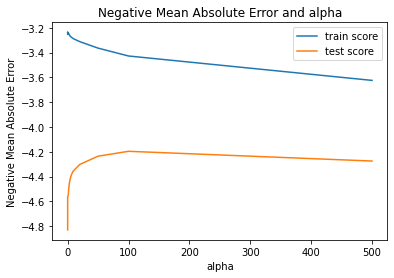

In [1381]:
# plotting mean test and train scoes with alpha

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1382]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=100)

In [1383]:
# check the coefficient values with lambda = 100

alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
ridge.coef_

array([-0.09593857,  0.05760734, -0.05284695,  0.609974  , -0.23551779,
        2.28583276,  0.00873299, -1.1661815 ,  0.39091358, -0.02082323,
       -0.78386173,  0.00891141, -0.68961391])

In [1384]:
# Evaluate the model
ridge_y_pre=ridge.predict(X_test)
print(mean_squared_error(Y_test, ridge.predict(X_test)))
print(r2_score(Y_test,ridge_y_pre))

20.174166081762703
0.0666072405198308


In [1385]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':name_data, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,CRIM,-0.0959
1,ZN,0.0576
2,INDUS,-0.0528
3,CHAS,0.6100
4,NOX,-0.2355
5,RM,2.2858
6,AGE,0.0087
7,DIS,-1.1662
8,RAD,0.3909
9,TAX,-0.0208


In [1386]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = name_data))
ridge_coeff_dict

{'CRIM': -0.0959,
 'ZN': 0.0576,
 'INDUS': -0.0528,
 'CHAS': 0.61,
 'NOX': -0.2355,
 'RM': 2.2858,
 'AGE': 0.0087,
 'DIS': -1.1662,
 'RAD': 0.3909,
 'TAX': -0.0208,
 'PTRATIO': -0.7839,
 'B': 0.0089,
 'LSTAT': -0.6896}

#### RFE

In [1387]:
# Do an RFE to minimise the features to 5

lm = LinearRegression()
lm.fit(X_train, Y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=13)
rfe = rfe.fit(X_train, Y_train)

In [1388]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign features to a temp dataframe for further display in the bar plot
# coef bigger than 0

temp1_df = pd.DataFrame(list(zip( name_data, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df[temp1_df['Coefficient']>0]
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
5,RM,True,1,2.2858
3,CHAS,True,1,0.6100
8,RAD,True,1,0.3909
1,ZN,True,1,0.0576
11,B,True,1,0.0089
6,AGE,True,1,0.0087


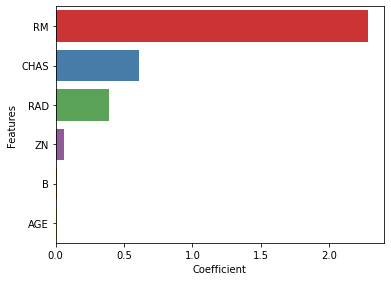

In [1389]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price
of a house.

#### Lasso

In [1390]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

lasso_model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1391]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
10,0.01,-3.238142,-4.706123,1
9,0.005,-3.243944,-4.766589,2
8,0.004,-3.245423,-4.778898,3
7,0.003,-3.247101,-4.791215,4
6,0.002,-3.248928,-4.803958,5
5,0.001,-3.250875,-4.817075,6
4,0.0005,-3.251889,-4.823681,7
3,0.0004,-3.252093,-4.825002,8
2,0.0003,-3.252298,-4.826323,9
1,0.0002,-3.252502,-4.827645,10


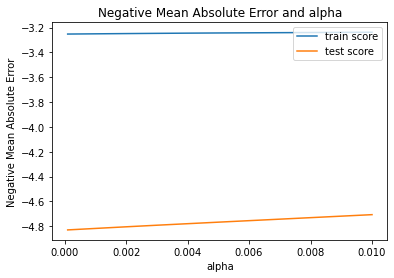

In [1392]:
# plotting mean test and train scoes with alpha

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1393]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.01)

In [1394]:
# check the coefficient values with lambda = 0.01

alpha = 0.01

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, Y_train)
lasso.coef_

array([-1.01188996e-01,  4.95932486e-02,  1.27821769e-02,  2.39149056e+00,
       -1.37946371e+01,  3.79027362e+00,  5.14872502e-03, -1.40243044e+00,
        3.49933481e-01, -1.61461793e-02, -8.68454291e-01,  9.24726215e-03,
       -5.61207784e-01])

In [1395]:
# Evaluate the model
lasso_y_pre=lasso.predict(X_test)
print(mean_squared_error(Y_test, lasso.predict(X_test)))
print(r2_score(Y_test,lasso_y_pre))

15.375250131477127
0.2886374044035158


In [1396]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':name_data, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,CRIM,-0.1012
1,ZN,0.0496
2,INDUS,0.0128
3,CHAS,2.3915
4,NOX,-13.7946
5,RM,3.7903
6,AGE,0.0051
7,DIS,-1.4024
8,RAD,0.3499
9,TAX,-0.0161


In [1397]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = name_data))
lasso_coeff_dict

{'CRIM': -0.10118899606467922,
 'ZN': 0.04959324864621967,
 'INDUS': 0.012782176938266691,
 'CHAS': 2.3914905646193128,
 'NOX': -13.79463712815093,
 'RM': 3.7902736209142334,
 'AGE': 0.0051487250213798595,
 'DIS': -1.4024304391854927,
 'RAD': 0.34993348058755724,
 'TAX': -0.016146179278044636,
 'PTRATIO': -0.8684542905255719,
 'B': 0.009247262153238112,
 'LSTAT': -0.5612077840868572}

#### RFE

In [1398]:
# Do an RFE to minimise the features to 15


lm = LinearRegression()
lm.fit(X_train, Y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=13)
rfe = rfe.fit(X_train, Y_train)

In [1399]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign features to a temp dataframe for further display in the bar plot
# coef bigger than 0

temp2_df = pd.DataFrame(list(zip( name_data, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df[temp2_df['Coefficient']>0]
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
5,RM,True,1,3.790274
3,CHAS,True,1,2.391491
8,RAD,True,1,0.349933
1,ZN,True,1,0.049593
2,INDUS,True,1,0.012782
11,B,True,1,0.009247
6,AGE,True,1,0.005149


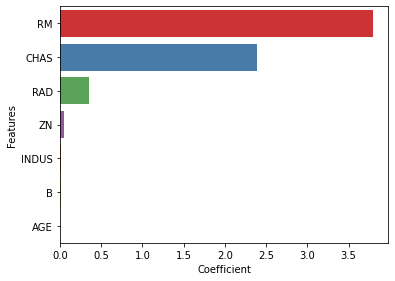

In [1400]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price
of a house.

## Conclusion :

- The r2 score in case of Ridge and Lasso are:
    - Ridge - 0.0666072405198308
    - Lasso - 0.2886374044035158

- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge - 20.174166081762703
    - Lasso - 15.375250131477127


- The r2 score of Lasso is slightly higher than that of Ridge,and the Mean Squared Error of Lasso is slightly lower than that of Ridge

- None of the two methods helps in feature reduction (no coefficient value became 0)

- Based on Lasso, the factors that generally affect the price (from higher to lower) are the RM,CHAS,RAD,ZN,INDUS,B and AGE

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the
price of a house.